In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import pingouin as pg

sns.set_theme(style='whitegrid')
sns.set_context('paper', font_scale=1.3)

scatterplot_marker_size = 15

In [4]:
df = pd.read_csv('datasets/clean/interim_clean_dataset_2021-07-19.csv')
df.head()

,fips,county_name,state,division,region,vaccine_hesitant,vaccine_hesitant_strong,vaccine_hesitant_category,social_vulnerability_index,ethnicity_hispanic,...,election_total_2012,election_dem_2012,election_gop_2012,election_oth_2012,election_total_2016,election_dem_2016,election_gop_2016,election_oth_2016,election_gop_2020,election_dem_2020
0,1131,"Wilcox County, Alabama",Alabama,East South Central,South,0.23,0.11,Medium,0.93,0.0053,...,6547,4867,1676,4,6095,4329,1737,29,1833,4048
1,1129,"Washington County, Alabama",Alabama,East South Central,South,0.23,0.11,Medium,0.73,0.0146,...,8761,2971,5749,41,8492,2366,6031,95,6564,2258
2,1133,"Winston County, Alabama",Alabama,East South Central,South,0.22,0.11,Medium,0.70,0.0315,...,9712,1286,8310,116,10255,871,9225,159,10195,974
3,1127,"Walker County, Alabama",Alabama,East South Central,South,0.23,0.11,Medium,0.75,0.0249,...,28497,6551,21633,313,29243,4486,24208,549,26002,4834
4,1125,"Tuscaloosa County, Alabama",Alabama,East South Central,South,0.22,0.10,Medium,0.63,0.0372,...,78495,32003,45703,789,81708,31746,47701,2261,51117,37765


In [5]:
# helper function to print all correlations of melted narrow dataframe of demographic factor with many subcategories (e.g. ethnicity, education, etc)
def get_correlation_values(factor, factor_value, factor_cols, df_narrow):
    for factor_col in factor_cols:
        print(factor_col, '\n', pg.corr(x=df_narrow[(df_narrow[factor] == factor_col) & (df_narrow['vaccine_hesitancy'] == 'vaccine_hesitant')][factor_value], y=df_narrow[(df_narrow[factor] == factor_col) & (df_narrow['vaccine_hesitancy'] == 'vaccine_hesitant')]['vaccine_hesitancy_value']), '\n\n')

In [6]:
# TODO: Bar charts (univariate) to explore vaccine hesitancy cluster groups along demographic data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fips                          3111 non-null   int64  
 1   county_name                   3111 non-null   object 
 2   state                         3111 non-null   object 
 3   division                      3111 non-null   object 
 4   region                        3111 non-null   object 
 5   vaccine_hesitant              3111 non-null   float64
 6   vaccine_hesitant_strong       3111 non-null   float64
 7   vaccine_hesitant_category     3111 non-null   object 
 8   social_vulnerability_index    3110 non-null   float64
 9   ethnicity_hispanic            3111 non-null   float64
 10  ethnicity_native              3111 non-null   float64
 11  ethnicity_asian               3111 non-null   float64
 12  ethnicity_black               3111 non-null   float64
 13  eth

## Vaccine Hesitancy
### Vaccine Hesitant

In [7]:
df['vaccine_hesitant'].describe()

count    3111.000000
mean        0.194744
std         0.046197
min         0.060000
25%         0.170000
50%         0.190000
75%         0.220000
max         0.320000
Name: vaccine_hesitant, dtype: float64

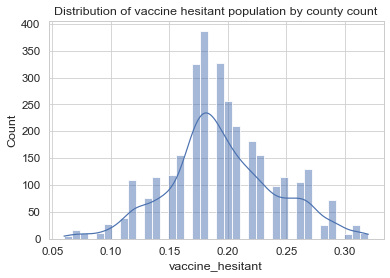

In [8]:
vaccine_hesitant_histogram = sns.histplot(data=df, x='vaccine_hesitant', kde=True).set_title('Distribution of vaccine hesitant population by county count')

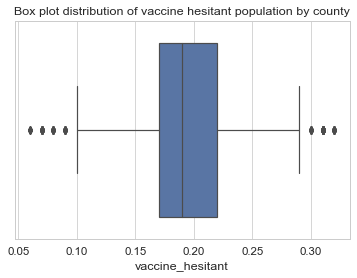

In [9]:
vaccine_hesitant_boxplot = sns.boxplot(data=df, x='vaccine_hesitant').set_title('Box plot distribution of vaccine hesitant population by county')

The vaccine hesitant population is distributed almost normally with a very small right skew, however that isn't too significant. There are slightly more outliers on the less hesitant side than the very hesitant side.

### Strongly Vaccine Hesitant

In [10]:
df['vaccine_hesitant_strong'].describe()

count    3111.000000
mean        0.092086
std         0.029398
min         0.020000
25%         0.070000
50%         0.090000
75%         0.110000
max         0.200000
Name: vaccine_hesitant_strong, dtype: float64

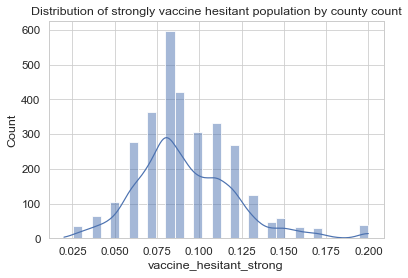

In [11]:
vaccine_hesitant_strong_histogram = sns.histplot(data=df, x='vaccine_hesitant_strong', kde=True).set_title('Distribution of strongly vaccine hesitant population by county count')

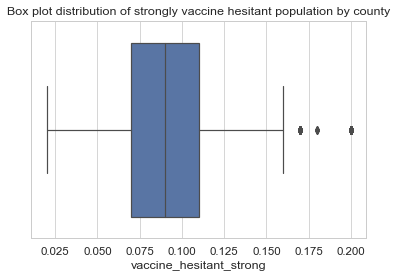

In [12]:
vaccine_hesitant_strong_boxplot = sns.boxplot(data=df, x='vaccine_hesitant_strong').set_title('Box plot distribution of strongly vaccine hesitant population by county')

The strongly vaccine hesitant distribution is also normally distributed, but seemingly less so this time. The distribution has a slight right skew. There are much more outliers on the hesitant side than there are on the less hesitant (the opposite of the last `vaccine_hesitant` distribution).

TODO: is this a fat tailed distribution?

## Ethnicity



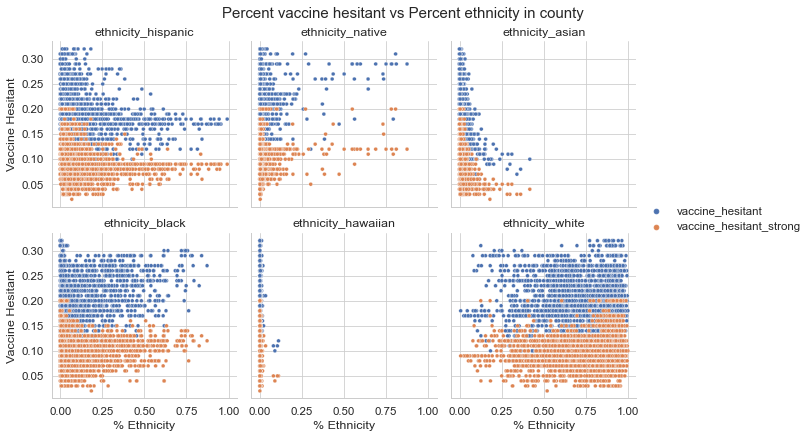

In [13]:
df_narrow_ethnicity = df.melt(id_vars=['ethnicity_hispanic', 'ethnicity_native', 'ethnicity_asian', 'ethnicity_black', 'ethnicity_hawaiian', 'ethnicity_white'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], var_name='vaccine_hesitancy', value_name='vaccine_hesitancy_value')
df_narrow_ethnicity = df_narrow_ethnicity.melt(id_vars=['vaccine_hesitancy', 'vaccine_hesitancy_value'], value_vars=['ethnicity_hispanic', 'ethnicity_native', 'ethnicity_asian', 'ethnicity_black', 'ethnicity_hawaiian', 'ethnicity_white'], value_name='ethnicity_percent', var_name='ethnicity')
graph = sns.FacetGrid(df_narrow_ethnicity, col='ethnicity', col_wrap=3)
graph.map_dataframe(sns.scatterplot, x='ethnicity_percent', y='vaccine_hesitancy_value', hue='vaccine_hesitancy', s=scatterplot_marker_size)
graph.fig.subplots_adjust(top=0.9)
graph.set_titles(row_template='{row_name}', col_template='{col_name}')
graph.fig.suptitle('Percent vaccine hesitant vs Percent ethnicity in county')
graph.add_legend()
_ = graph.set_axis_labels('% Ethnicity', 'Vaccine Hesitant')
# TODO: Figure out better way to visualize. Group dots into larger points?

In [15]:
get_correlation_values('ethnicity', 'ethnicity_percent', ['ethnicity_hispanic', 'ethnicity_native', 'ethnicity_asian', 'ethnicity_black', 'ethnicity_hawaiian', 'ethnicity_white'], df_narrow_ethnicity)

ethnicity_hispanic 
             n         r           CI95%         p-val      BF10  power
pearson  3111 -0.217225  [-0.25, -0.18]  1.526469e-34  9.18e+30    1.0 


ethnicity_native 
             n         r        CI95%         p-val       BF10  power
pearson  3111  0.162865  [0.13, 0.2]  6.161743e-20  3.083e+16    1.0 


ethnicity_asian 
             n        r           CI95%         p-val       BF10  power
pearson  3111 -0.35186  [-0.38, -0.32]  2.403958e-91  3.323e+87    1.0 


ethnicity_black 
             n         r        CI95%         p-val       BF10  power
pearson  3111  0.270193  [0.24, 0.3]  3.502269e-53  3.137e+49    1.0 


ethnicity_hawaiian 
             n         r           CI95%         p-val       BF10     power
pearson  3111 -0.092862  [-0.13, -0.06]  2.118671e-07  1.566e+04  0.999387 


ethnicity_white 
             n         r           CI95%     p-val   BF10     power
pearson  3111 -0.040634  [-0.08, -0.01]  0.023425  0.293  0.620561 




Our ethnicity plots don't show a strong relationship between vaccine hesitancy and county ethnic composition. It's difficult to tell in some cases because of the low minority population in many counties, which tend to show a plot clustered around the y-axis.

* *Hispanic* - plots show an almost 2D bell curve distribution with a normal at 18% vaccine hesitant and 9% strongly vaccine hesitant. Both of these figures are similar to the overall total vaccine hesitant distributions above.

* *Native* - counties with higher Native populations seem to be more highly vaccine hesitant. However the vast majority of counties have a very small Native population, which is somewhat normally distributed along vaccine hesitancy.

* *Asian* - counties with higher Asian populations tend to be less vaccine hesitant and strongly vaccine hesitant.

* *Black* - counties with higher Black populations seem to have a higher percent of vaccine hesitant, but not strongly vaccine hesitant populations.

* *Hawaiian* - counties with a larger Hawaiian composition tend to be evenly distributed along vaccine hesitancy except for a small modal bump at a very low vaccine hesitancy of 10% and strongly vaccine hesitant 5%.

* *White* - the strongly vaccine hesitant white show a slight 2D bell curve distribution with a normal at 10% hesitancy. The vaccine hesitant graph doesn't show a clear relationship

When we do Pearson correlation tests on each ethnicity, we find that the white category is statistically insignificant, while the others are. There seems to be a moderate and strong negative correlation with Hispanic and Asian groups, while Black and Native have a strong and moderate positive correlation with vaccine hesitancy.

## Geography
### Region

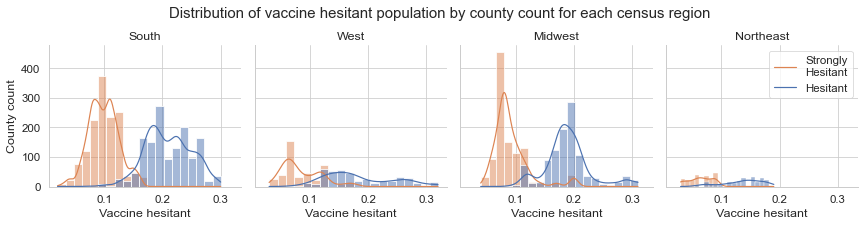

In [17]:
df_narrow_region = df.melt(id_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_vars=['region'], value_name='Region')
graph = sns.FacetGrid(df_narrow_region, col='Region')
graph.map_dataframe(sns.histplot, bins=20, kde=True)
graph.fig.subplots_adjust(top=0.8)
graph.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.legend(labels=['Strongly\nHesitant', 'Hesitant'])
graph.fig.suptitle('Distribution of vaccine hesitant population by county count for each census region')
_ = graph.set_axis_labels("Vaccine hesitant", "County count")

In [18]:
pg.anova(data=df_narrow_region, dv='vaccine_hesitant', between='Region')

,Source,ddof1,ddof2,F,p-unc,np2
0,Region,3,3107,213.545854,6.096076e-126,0.170944


In [19]:
pg.anova(data=df_narrow_region, dv='vaccine_hesitant_strong', between='Region')

,Source,ddof1,ddof2,F,p-unc,np2
0,Region,3,3107,114.560627,2.319728e-70,0.099598


In [20]:
pg.pairwise_tukey(data=df_narrow_region, dv='vaccine_hesitant', between='Region')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Midwest,Northeast,0.189829,0.136728,0.053101,0.003137,16.926288,0.001000,1.261036
1,Midwest,South,0.189829,0.210155,-0.020325,0.001711,-11.882738,0.001000,-0.482825
2,Midwest,West,0.189829,0.184833,0.004997,0.002433,2.054080,0.168824,0.118670
3,Northeast,South,0.136728,0.210155,-0.073427,0.003067,-23.940010,0.001000,-1.743954
4,Northeast,West,0.136728,0.184833,-0.048104,0.003521,-13.661453,0.001000,-1.141697
5,South,West,0.210155,0.184833,0.025322,0.002341,10.814608,0.001000,0.601457


We look at the vaccine hesitant and strongly vaccine hesitant populations by census region. The South and Midwest have a highly differentiated distribution of the two variables with little overlap. The West and Northeast have much more of an overlap. This may suggest that opinion on vaccine hesitancy may be more polarized in the South and Midwest.

Our ANOVA tests of vaccine hesitancy (both types) indicates a statistically significant difference between the regional groups. Running pairwise Tukey t-tests, as well, shows that most of the differences between regions are statistically significant (apart from Midwest and West, possibly indicating geographic/cultural similarity between the two).

### Division

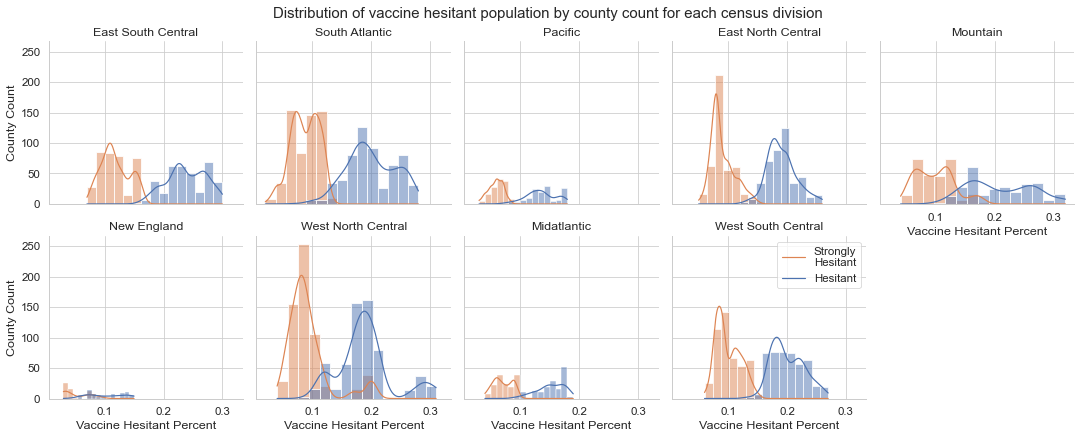

In [21]:
df_narrow_division = df.melt(id_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_vars=['division'], value_name='Division')
graph = sns.FacetGrid(df_narrow_division, col='Division', col_wrap=5)
graph.map_dataframe(sns.histplot, bins=15, kde=True)
graph.fig.subplots_adjust(top=0.9)
graph.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.legend(labels=['Strongly\nHesitant', 'Hesitant'])
graph.fig.suptitle('Distribution of vaccine hesitant population by county count for each census division')
_ = graph.set_axis_labels("Vaccine Hesitant Percent", "County Count")

In [22]:
pg.anova(data=df_narrow_division, dv='vaccine_hesitant', between='Division')

,Source,ddof1,ddof2,F,p-unc,np2
0,Division,8,3102,184.689724,8.477221e-256,0.322636


In [23]:
pg.anova(data=df_narrow_division, dv='vaccine_hesitant_strong', between='Division')

,Source,ddof1,ddof2,F,p-unc,np2
0,Division,8,3102,121.361305,3.214706e-177,0.238379


In [24]:
pg.pairwise_tukey(data=df_narrow_division, dv='vaccine_hesitant', between='Division')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,East North Central,East South Central,0.190984,0.238407,-0.047423,0.002702,-17.553852,0.001000,-1.244484
1,East North Central,Midatlantic,0.190984,0.151400,0.039584,0.003603,10.987492,0.001000,1.038422
2,East North Central,Mountain,0.190984,0.209217,-0.018233,0.002911,-6.263311,0.001000,-0.478428
3,East North Central,New England,0.190984,0.103881,0.087103,0.004995,17.438522,0.001000,2.284532
4,East North Central,Pacific,0.190984,0.134818,0.056166,0.003728,15.067248,0.001000,1.473394
5,East North Central,South Atlantic,0.190984,0.199575,-0.008591,0.002404,-3.572854,0.010785,-0.225491
6,East North Central,West North Central,0.190984,0.189011,0.001973,0.002380,0.828747,0.900000,0.051778
7,East North Central,West South Central,0.190984,0.201511,-0.010527,0.002530,-4.160909,0.001085,-0.276275
8,East South Central,Midatlantic,0.238407,0.151400,0.087007,0.003694,23.554762,0.001000,2.282060
9,East South Central,Mountain,0.238407,0.209217,0.029190,0.003023,9.655230,0.001000,0.765829


We look at the vaccine hesitant and strongly vaccine hesitant populations by census division. Similar to the regional analysis, Southern region divisions (*East South Central*, *West South Central* and *South Atlantic Division*) show a highly differentiated distribution of the two variables with little overlap. Midwest divisions like *West North Central* and  The west and northeast have much more of an overlap. This may suggest that opinion on vaccine hesitancy may be more polarized in the South and Midwest.

Our ANOVA tests of vaccine hesitancy (both types) indicates a statistically significant difference between the division groups.

### State

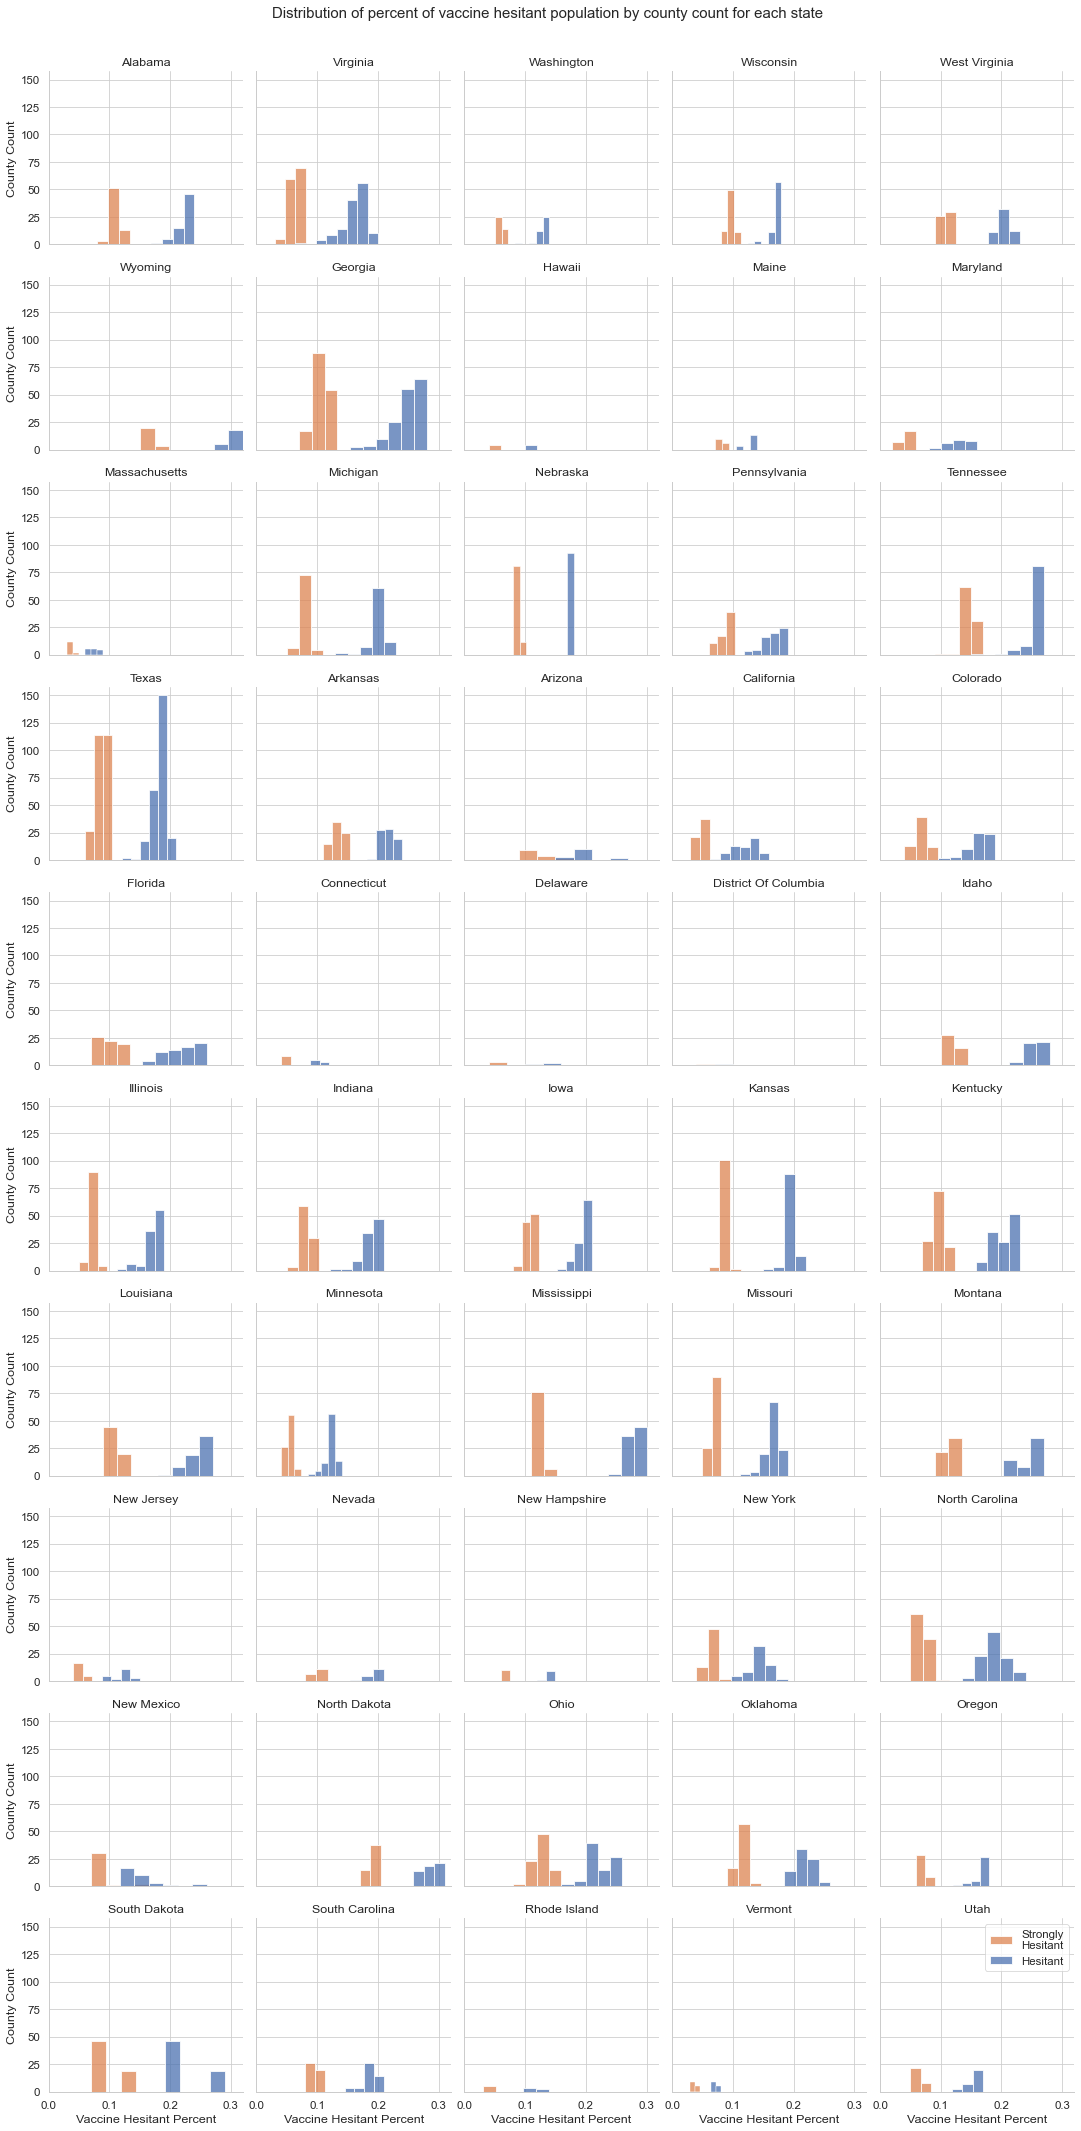

In [25]:
df_narrow_state = df.melt(id_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_vars=['state'], value_name='State')
graph = sns.FacetGrid(df_narrow_state, col='State', col_wrap=5)
graph.map_dataframe(sns.histplot)
graph.set_axis_labels('Vaccine Hesitant Percent', 'County Count')
plt.legend(labels=['Strongly\nHesitant', 'Hesitant'])
graph.fig.subplots_adjust(top=0.95)
graph.set_titles(row_template='{row_name}', col_template='{col_name}')
graph.fig.suptitle('Distribution of percent of vaccine hesitant population by county count for each state')
_ = plt.xlim(0, 0.32)

In [26]:
pg.anova(data=df_narrow_state, dv='vaccine_hesitant', between='State')

,Source,ddof1,ddof2,F,p-unc,np2
0,State,49,3061,395.889586,0.0,0.863711


In [27]:
pg.anova(data=df_narrow_state, dv='vaccine_hesitant_strong', between='State')

,Source,ddof1,ddof2,F,p-unc,np2
0,State,49,3061,548.682297,0.0,0.897784


We look at the vaccine hesitant and strongly vaccine hesitant populations by state. 

Our ANOVA tests of vaccine hesitancy (both types) indicates a statistically significant difference between the different states.

### Rural Urban Code

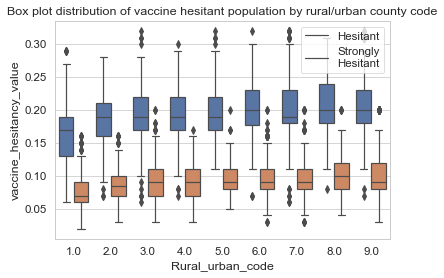

In [28]:
df_narrow_rural_urban = df.melt(id_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_vars=['rural_urban_code'], value_name='Rural_urban_code')
df_narrow_rural_urban = df_narrow_rural_urban.melt(id_vars=['Rural_urban_code'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], var_name='vaccine_hesitancy', value_name='vaccine_hesitancy_value')
rural_urban_code_boxplot = sns.boxplot(data=df_narrow_rural_urban, x='Rural_urban_code', y='vaccine_hesitancy_value', hue='vaccine_hesitancy').set_title('Box plot distribution of vaccine hesitant population by rural/urban county code')
_ = plt.legend(labels=['Hesitant', 'Strongly\nHesitant'], loc='upper right')

In [29]:
pg.anova(data=df_narrow_rural_urban[df_narrow_rural_urban['vaccine_hesitancy'] == 'vaccine_hesitant'], dv='vaccine_hesitancy_value', between='Rural_urban_code')

,Source,ddof1,ddof2,F,p-unc,np2
0,Rural_urban_code,8,3102,34.396436,1.943360e-52,0.08148


In [30]:
pg.anova(data=df_narrow_rural_urban[df_narrow_rural_urban['vaccine_hesitancy'] == 'vaccine_hesitant_strong'], dv='vaccine_hesitancy_value', between='Rural_urban_code')

,Source,ddof1,ddof2,F,p-unc,np2
0,Rural_urban_code,8,3102,32.140326,6.567367e-49,0.076545


In [31]:
pg.pairwise_tukey(data=df_narrow_rural_urban[df_narrow_rural_urban['vaccine_hesitancy'] == 'vaccine_hesitant'], dv='vaccine_hesitancy_value', between='Rural_urban_code')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1.0,2.0,0.166481,0.186489,-0.020008,0.003127,-6.398964,0.001000,-0.450895
1,1.0,3.0,0.166481,0.193051,-0.026569,0.003178,-8.359723,0.001000,-0.598748
2,1.0,4.0,0.166481,0.191869,-0.025388,0.003706,-6.850684,0.001000,-0.571999
3,1.0,5.0,0.166481,0.202198,-0.035716,0.005113,-6.984847,0.001000,-0.804487
4,1.0,6.0,0.166481,0.201841,-0.035360,0.002805,-12.604924,0.001000,-0.797019
5,1.0,7.0,0.166481,0.203812,-0.037330,0.003029,-12.324965,0.001000,-0.841315
6,1.0,8.0,0.166481,0.205845,-0.039363,0.003677,-10.703925,0.001000,-0.886885
7,1.0,9.0,0.166481,0.207892,-0.041411,0.003060,-13.530789,0.001000,-0.933258
8,2.0,3.0,0.186489,0.193051,-0.006561,0.003283,-1.998549,0.538038,-0.147854
9,2.0,4.0,0.186489,0.191869,-0.005380,0.003796,-1.417161,0.890522,-0.121196


We see a slight increase in vaccine hesitant and strongly vaccine hesitant populations with an increase in the rural urban code. This suggests that more rural counties may have higher vaccine hesitant populations.

Our ANOVA tests of vaccine hesitancy (both types) indicates a statistically significant difference between the rural-urban codes. When doing pairwise Tukey t-tests, we see that there are statistically significant differences between rural urban codes that are far apart (3+) like counties of code 3 vs 6, but codes that are close together like 8 vs 9 are not statistically significant.

### Urban Influence Code

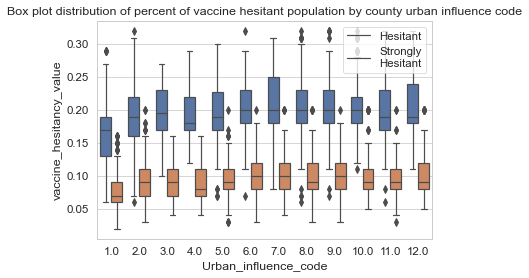

In [32]:
df_narrow_urban_influence = df.melt(id_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_vars=['urban_influence_code'], value_name='Urban_influence_code')
df_narrow_urban_influence = df_narrow_urban_influence.melt(id_vars=['Urban_influence_code'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], var_name='vaccine_hesitancy', value_name='vaccine_hesitancy_value')

urban_influence_code_boxplot = sns.boxplot(data=df_narrow_urban_influence, x='Urban_influence_code', y='vaccine_hesitancy_value', hue='vaccine_hesitancy').set_title('Box plot distribution of percent of vaccine hesitant population by county urban influence code')
_ = plt.legend(labels=['Hesitant', 'Strongly\nHesitant'], loc='upper right')

In [33]:
pg.anova(data=df_narrow_urban_influence[df_narrow_urban_influence['vaccine_hesitancy'] == 'vaccine_hesitant'], dv='vaccine_hesitancy_value', between='Urban_influence_code')

,Source,ddof1,ddof2,F,p-unc,np2
0,Urban_influence_code,11,3099,25.545112,2.430411e-51,0.083135


In [34]:
pg.anova(data=df_narrow_urban_influence[df_narrow_urban_influence['vaccine_hesitancy'] == 'vaccine_hesitant_strong'], dv='vaccine_hesitancy_value', between='Urban_influence_code')

,Source,ddof1,ddof2,F,p-unc,np2
0,Urban_influence_code,11,3099,24.620696,2.226513e-49,0.080368


We see a slight increase in vaccine hesitant and strongly vaccine hesitant populations with an increase in the urban influence code. This suggests that less urban developed counties may have higher vaccine hesitant populations.

Our ANOVA tests of vaccine hesitancy (both types) indicates a statistically significant difference between the rural-urban codes.

## Population

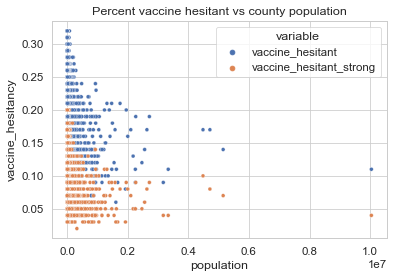

In [35]:
df_narrow_population = df.melt(id_vars=['population'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_name='vaccine_hesitancy')
population_scatterplot = sns.scatterplot(data=df_narrow_population, x='population', y='vaccine_hesitancy', hue='variable', s=scatterplot_marker_size).set_title('Percent vaccine hesitant vs county population')

In [36]:
pg.ttest(x=df['population'], y=df['vaccine_hesitant'], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,17.528396,3110,two-sided,1.130661e-65,"[93493.96, 117044.84]",0.444434,7.448e+61,1.0


In [37]:
pg.ttest(x=df['population'], y=df['vaccine_hesitant_strong'], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,17.528413,3110,two-sided,1.130347e-65,"[93494.06, 117044.94]",0.444434,7.45e+61,1.0


## Birth Rate

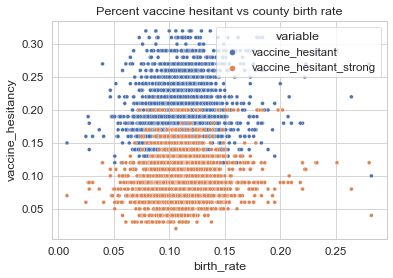

In [38]:
df_narrow_birth_rate = df.melt(id_vars=['birth_rate'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_name='vaccine_hesitancy')
birth_rate_scatterplot = sns.scatterplot(data=df_narrow_birth_rate, x='birth_rate', y='vaccine_hesitancy', hue='variable', s=scatterplot_marker_size).set_title('Percent vaccine hesitant vs county birth rate')

In [39]:
pg.ttest(x=df['birth_rate'], y=df['vaccine_hesitant'], paired=True)

C:\Users\Ksubramaniam\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-98.444146,3110,two-sided,0.0,"[-0.09, -0.08]",2.31928,inf,1.0


In [40]:
pg.ttest(x=df['birth_rate'], y=df['vaccine_hesitant_strong'], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,28.148757,3110,two-sided,1.701696e-155,"[0.02, 0.02]",0.663166,2.798e+151,1.0


In [41]:
pg.corr(x=df['birth_rate'], y=df['vaccine_hesitant_strong'])

,n,r,CI95%,p-val,BF10,power
pearson,3111,0.140062,"[0.11, 0.17]",4.236299e-15,5.231e+11,1.0


## Economic

### Median Income

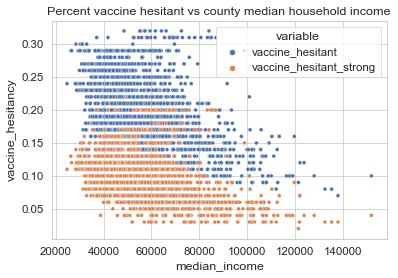

In [42]:
df_narrow_median_income = df.melt(id_vars=['median_income'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_name='vaccine_hesitancy')
median_income_scatterplot = sns.scatterplot(data=df_narrow_median_income, x='median_income', y='vaccine_hesitancy', hue='variable', s=scatterplot_marker_size).set_title('Percent vaccine hesitant vs county median household income')

In [43]:
pg.ttest(x=df['median_income'], y=df['vaccine_hesitant'], paired=True)

C:\Users\Ksubramaniam\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,214.665872,3110,two-sided,0.0,"[55101.45, 56117.31]",5.442879,inf,1.0


In [44]:
pg.ttest(x=df['median_income'], y=df['vaccine_hesitant_strong'], paired=True)

C:\Users\Ksubramaniam\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,214.666419,3110,two-sided,0.0,"[55101.55, 56117.41]",5.442889,inf,1.0


In [45]:
pg.corr(x=df['median_income'], y=df['vaccine_hesitant'])

,n,r,CI95%,p-val,BF10,power
pearson,3111,-0.466522,"[-0.49, -0.44]",6.088984e-168,8.847e+163,1.0


We see an inverse relationship between both vaccine hesitant and strongly vaccine hesitant populations and median household income. The relationship seems to be stronger with the strongly vaccine hesitant population.

### Unemployment

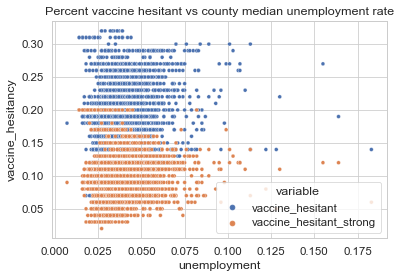

In [46]:
df_narrow_unemployment = df.melt(id_vars=['unemployment'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_name='vaccine_hesitancy')
median_income_scatterplot = sns.scatterplot(data=df_narrow_unemployment, x='unemployment', y='vaccine_hesitancy', hue='variable', s=scatterplot_marker_size).set_title('Percent vaccine hesitant vs county median unemployment rate')

In [47]:
pg.ttest(x=df['unemployment'], y=df['vaccine_hesitant'], paired=True)

C:\Users\Ksubramaniam\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-187.733273,3110,two-sided,0.0,"[-0.16, -0.15]",4.549103,inf,1.0


In [48]:
pg.ttest(x=df['unemployment'], y=df['vaccine_hesitant_strong'], paired=True)

C:\Users\Ksubramaniam\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-93.992068,3110,two-sided,0.0,"[-0.05, -0.05]",2.283999,inf,1.0


In [49]:
pg.corr(x=df['unemployment'], y=df['vaccine_hesitant'])

,n,r,CI95%,p-val,BF10,power
pearson,3111,0.157334,"[0.12, 0.19]",1.075302e-18,1.831e+15,1.0


### Poverty

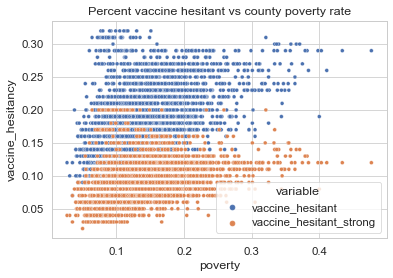

In [50]:
df_narrow_poverty = df.melt(id_vars=['poverty'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_name='vaccine_hesitancy')
poverty_scatterplot = sns.scatterplot(data=df_narrow_poverty, x='poverty', y='vaccine_hesitancy', hue='variable', s=scatterplot_marker_size).set_title('Percent vaccine hesitant vs county poverty rate')

In [51]:
pg.ttest(x=df['poverty'], y=df['vaccine_hesitant'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-37.794319,6220,two-sided,1.415065e-281,"[-0.05, -0.05]",0.958278,1.85e+277,1.0


In [52]:
pg.ttest(x=df['poverty'], y=df['vaccine_hesitant_strong'])

C:\Users\Ksubramaniam\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,45.210827,6220,two-sided,0.0,"[0.05, 0.05]",1.146324,inf,1.0


In [53]:
pg.corr(x=df['poverty'], y=df['vaccine_hesitant'])

,n,r,CI95%,p-val,BF10,power
pearson,3111,0.411583,"[0.38, 0.44]",1.716123e-127,3.776e+123,1.0


## Education

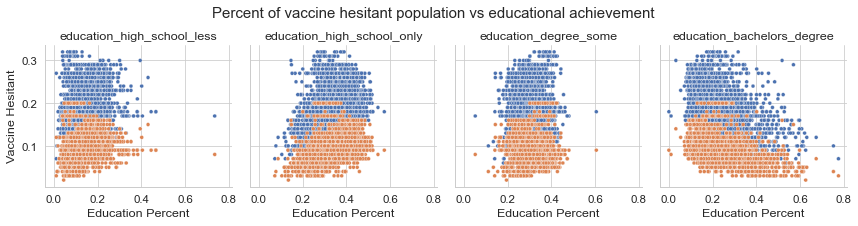

In [54]:
df_narrow_education = df.melt(id_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_vars=['education_high_school_less', 'education_high_school_only', 'education_degree_some', 'education_bachelors_degree'], var_name='education', value_name='education_percent')
df_narrow_education = df_narrow_education.melt(id_vars=['education', 'education_percent'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], var_name='vaccine_hesitancy', value_name='vaccine_hesitancy_value')
graph = sns.FacetGrid(df_narrow_education, col='education')
graph.map_dataframe(sns.scatterplot, x='education_percent', y='vaccine_hesitancy_value', hue='vaccine_hesitancy', s=scatterplot_marker_size)
graph.set_titles(row_template='{row_name}', col_template='{col_name}')
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle('Percent of vaccine hesitant population vs educational achievement')
_ = graph.set_axis_labels("Education Percent", "Vaccine Hesitant")

In [63]:
get_correlation_values('education', 'education_percent', ['education_high_school_less', 'education_high_school_only', 'education_degree_some', 'education_bachelors_degree'], df_narrow_education)

education_high_school_less 
             n         r         CI95%         p-val       BF10  power
pearson  3111  0.285588  [0.25, 0.32]  1.821305e-59  5.657e+55    1.0 


education_high_school_only 
             n         r         CI95%         p-val       BF10  power
pearson  3111  0.351244  [0.32, 0.38]  5.186867e-91  1.544e+87    1.0 


education_degree_some 
             n         r          CI95%     p-val   BF10     power
pearson  3111 -0.027568  [-0.06, 0.01]  0.124221  0.073  0.336567 


education_bachelors_degree 
             n         r           CI95%          p-val        BF10  power
pearson  3111 -0.436679  [-0.46, -0.41]  4.795383e-145  1.241e+141    1.0 




* For the two plots for less than high school education, we see a slight linear relationship between vaccine hesitancy and increase of percent of less than high school education population.

* This relationship weakens with the more educated high school graduate only plots.

* The some post-secondary degree group does not have a significant relationship.

* The bachelors degree and higher graphs show an inverse relationship between the amount of population with a bachelors degree and vaccine hesitancy.


## Religion

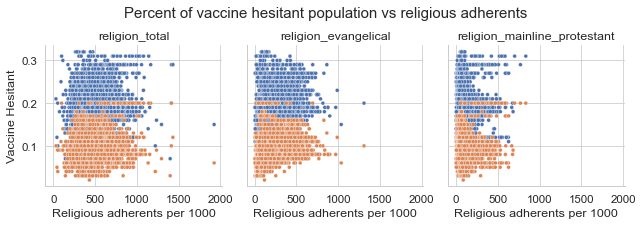

In [58]:
df_narrow_religion = df.melt(id_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], value_vars=['religion_total', 'religion_evangelical', 'religion_mainline_protestant'], value_name='religion_value', var_name='religion')
df_narrow_religion = df_narrow_religion.melt(id_vars=['religion', 'religion_value'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], var_name='vaccine_hesitancy', value_name='vaccine_hesitancy_value')
graph = sns.FacetGrid(df_narrow_religion, col='religion')
graph.map_dataframe(sns.scatterplot, x='religion_value', y='vaccine_hesitancy_value', hue='vaccine_hesitancy', s=scatterplot_marker_size)
graph.set_titles(row_template='{row_name}', col_template='{col_name}')
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle('Percent of vaccine hesitant population vs religious adherents')
_ = graph.set_axis_labels("Religious adherents per 1000", "Vaccine Hesitant")

In [64]:
get_correlation_values('religion', 'religion_value', ['religion_total', 'religion_evangelical', 'religion_mainline_protestant'], df_narrow_religion)

religion_total 
             n         r         CI95%     p-val    BF10     power
pearson  3111  0.080017  [0.05, 0.11]  0.000008  484.49  0.993984 


religion_evangelical 
             n         r         CI95%         p-val      BF10  power
pearson  3093  0.302702  [0.27, 0.33]  1.481461e-66  6.53e+62    1.0 


religion_mainline_protestant 
             n         r          CI95%    p-val   BF10     power
pearson  3088 -0.026346  [-0.06, 0.01]  0.14327  0.066  0.310226 




Our hypothesis going into this was religiosity had an effect on vaccine hesitancy, however these graphs don't show as strong a relationship as expected.

* Total religious adherents doesn't seem to have a relationship with vaccine hesitancy

* Evangelical adherent numbers have a slight uptake as vaccine hesitancy increases but then does not increase much after the mean.

* Mainline protestant has a slight bell curve distribution with some concentration on the upper end of vaccine hesitancy, however not very strongly.

## Politics

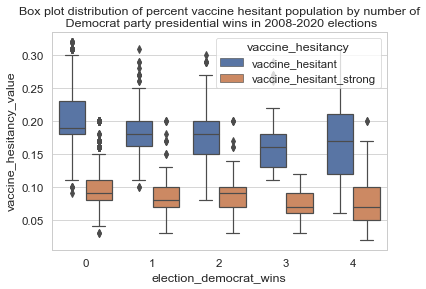

In [ ]:
df_narrow_democrat_wins = df.melt(id_vars=['election_democrat_wins'], value_vars=['vaccine_hesitant', 'vaccine_hesitant_strong'], var_name='vaccine_hesitancy', value_name='vaccine_hesitancy_value')
election_democrat_wins_boxplot = sns.boxplot(data=df_narrow_democrat_wins, x='election_democrat_wins', y='vaccine_hesitancy_value', hue='vaccine_hesitancy').set_title('Box plot distribution of percent vaccine hesitant population by number of\n Democrat party presidential wins in 2008-2020 elections')
# TODO: # individual votes democrat/republican vs vaccine hesitancy

In [ ]:
pg.anova(data=df_narrow_democrat_wins[df_narrow_democrat_wins['vaccine_hesitancy'] == 'vaccine_hesitant'], dv='vaccine_hesitancy_value', between='election_democrat_wins')

,Source,ddof1,ddof2,F,p-unc,np2
0,election_democrat_wins,4,3106,69.661292,1.462286e-56,0.082326


In [ ]:
pg.anova(data=df_narrow_democrat_wins[df_narrow_democrat_wins['vaccine_hesitancy'] == 'vaccine_hesitant_strong'], dv='vaccine_hesitancy_value', between='election_democrat_wins')

,Source,ddof1,ddof2,F,p-unc,np2
0,election_democrat_wins,4,3106,47.805469,4.614219e-39,0.057995


In [65]:
pg.corr(x=df['election_democrat_wins'], y=df['vaccine_hesitant'])

,n,r,CI95%,p-val,BF10,power
pearson,3111,-0.278739,"[-0.31, -0.25]",1.276140e-56,8.305e+52,1.0


As the number of Democrat party presidential wins in 2008-2020 elections increase, we see a slight decrease in both vaccine hesitant and strongly vaccine hesitant populations. The last box plot with 4 Democrat wins is a bit of an outlier since vaccine hesitancy increases a bit, however the variance, shown by the whiskers, of the population is much larger. 

## Correlation Matrix

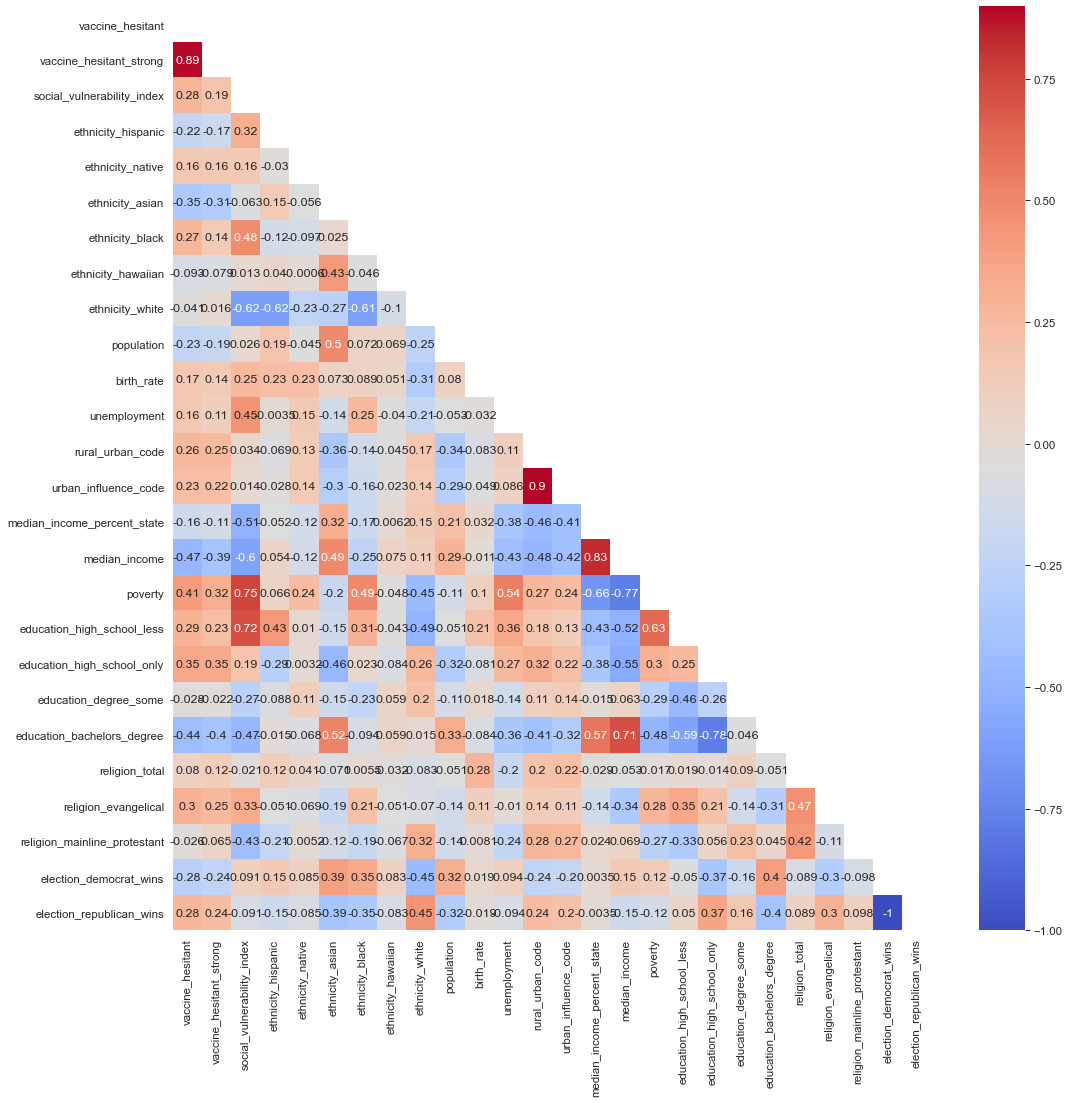

In [ ]:
corr = df.drop(['fips', 'election_total_2008', 'election_dem_2008', 'election_gop_2008', 'election_oth_2008', 'election_total_2012', 'election_dem_2012', 'election_gop_2012', 'election_oth_2012', 'election_total_2016', 'election_dem_2016', 'election_gop_2016', 'election_oth_2016', 'election_dem_2020', 'election_gop_2020'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17, 17))
heatmap = sns.heatmap(corr, fmt='.2g', mask=mask, annot=True, cmap='coolwarm')

## Choropleth Visualization

In [ ]:
import folium

df_map = df[['fips', 'vaccine_hesitant']].copy()
df_map['fips'] = df_map['fips'].astype(str)

map = folium.Map(location=[39.8282, -98.5795], zoom_start=5)
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json',
    name="choropleth",
    data=df_map,
    columns=['fips', 'vaccine_hesitant'],
    key_on='feature.id',
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Vaccine Hesitancy (%)",
).add_to(map)
folium.LayerControl().add_to(map)
map
# TODO: explore bivariate choropleth maps? hue (vaccine hesitancy) vs opacity (other demographic var)